# Social Media Sentiment Analysis
***

In [140]:
# Importing Libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Load the dataset :
df = pd.read_csv('SentimentAnalysis.csv')
df.sample(3)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
197,198,200,"Lost in the vast sea of information, an indif...",Indifference,2022-11-28 17:30:00,ApatheticObserver,Instagram,#Indifference #DigitalOverload,7.0,15.0,Canada,2022,11,28,17
394,395,399,Soaring like a free spirit on the winds of a c...,Freedom,2021-02-28 13:00:00,CoastalExplorer,Twitter,#Freedom #CoastalAdventure,30.0,60.0,Australia,2021,2,28,13
479,480,484,"In the garden of friendships, each bloom a tes...",Friendship,2018-08-28 16:00:00,FriendshipGarden,Instagram,#Friendship #CamaraderieBlooms,30.0,60.0,South Africa,2018,8,28,16


## Data PreProcessing 

In [6]:
# Basic Information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [7]:
# Shape of the data :
print(f'Shape of the data :- Rows = {df.shape[0]} & Columns = {df.shape[1]}')

Shape of the data :- Rows = 732 & Columns = 15


In [8]:
# check the datatypes :
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [9]:
# descriptive statistics values of all the numerical columns :
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [10]:
# check any Null values or not.
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [11]:
# check any Duplicate values or not
df.duplicated().sum()

0

In [12]:
# Columns name of the Dataset
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [142]:
# drop Unnecessary columns :
df= df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','Day', 'Hour'])
df.sample()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Cleaned_Text,Sentiment_Score,Sentiment_Label,Broad_Sentiment
392,Joyful laughter resonates through a lively sum...,FestiveJoy,2020-12-15 15:45:00,CarnivalGoer,Facebook,#FestiveJoy #SummerCarnival,22.0,45.0,Japan,2020,12,joyful laughter resonates lively summer carnival,0.136364,1,Neutral


In [14]:
# different types of Platform for sentiment analysis :
df['Platform'].value_counts()

Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [144]:
df['Platform'] = df['Platform'].str.strip()
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

In [15]:
# different types of Country :
df['Country'].value_counts()

Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
                  ..
Netherlands        1
USA                1
Germany            1
France             1
USA                1
Name: count, Length: 115, dtype: int64

In [146]:
df['Country'] = df['Country'].str.strip()
df['Country'].value_counts()

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

## Sentiment Analysis

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to clean and preprocess text without using NLTK
def preprocess_text_alternative(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"\@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    tokens = text.split()  # Simple whitespace-based tokenization
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Remove stopwords using sklearn
    return " ".join(tokens)

# Apply alternative preprocessing
df["Cleaned_Text"] = df["Text"].apply(preprocess_text_alternative)

# Display sample cleaned text
df[["Text", "Cleaned_Text"]].head()


,Text,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,just finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [17]:
# Sentiment Score Extraction: Use a pre-trained model to analyze sentiment :

from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df["Sentiment_Score"] = df["Cleaned_Text"].apply(get_sentiment_polarity)

# Display sample results
df[["Cleaned_Text", "Sentiment", "Sentiment_Score"]].head()


,Cleaned_Text,Sentiment,Sentiment_Score
0,enjoying beautiful day park,Positive,0.675000
1,traffic terrible morning,Negative,-1.000000
2,just finished amazing workout,Positive,0.600000
3,excited upcoming weekend getaway,Positive,0.375000
4,trying new recipe dinner tonight,Neutral,0.136364


The Sentiment_Score column represents sentiment polarity, where:
* Positive values (>0) indicate positive sentiment.
* Negative values (<0) indicate negative sentiment.
* Values near 0 suggest neutral sentiment.

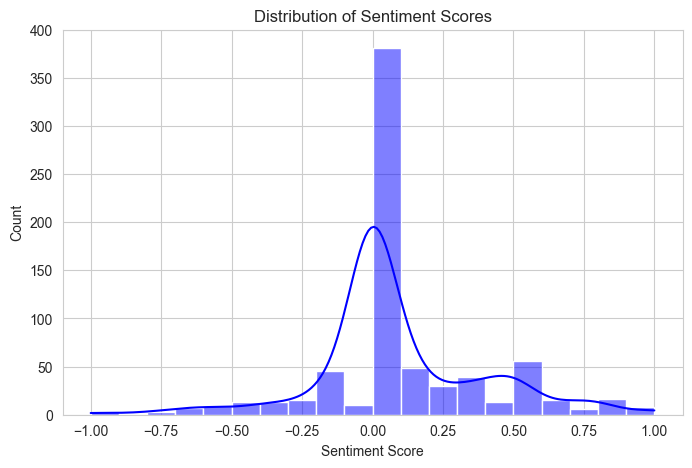

In [19]:
# Visualization of sentiment distribution and trends over time:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set_style("whitegrid")

# Sentiment distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment_Score"], bins=20, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Scores")
plt.show()


The histogram shows the distribution of sentiment scores, with most values clustered around positive and neutral sentiments.

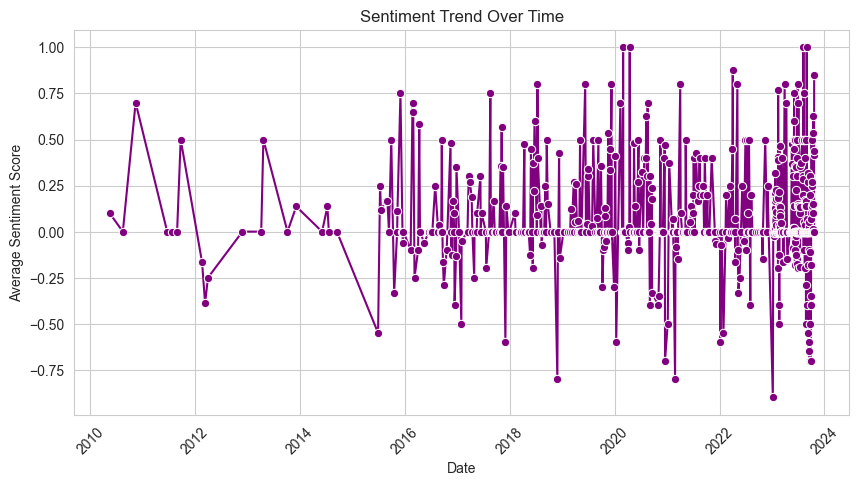

In [21]:
# Convert Timestamp to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Aggregate sentiment scores by date
df_trend = df.groupby(df["Timestamp"].dt.date)["Sentiment_Score"].mean().reset_index()

# Plot sentiment trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_trend["Timestamp"], y=df_trend["Sentiment_Score"], marker="o", color="purple")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend Over Time")
plt.xticks(rotation=45)
plt.show()


The sentiment trend over time shows fluctuations in public sentiment, with periods of positive and negative sentiment.

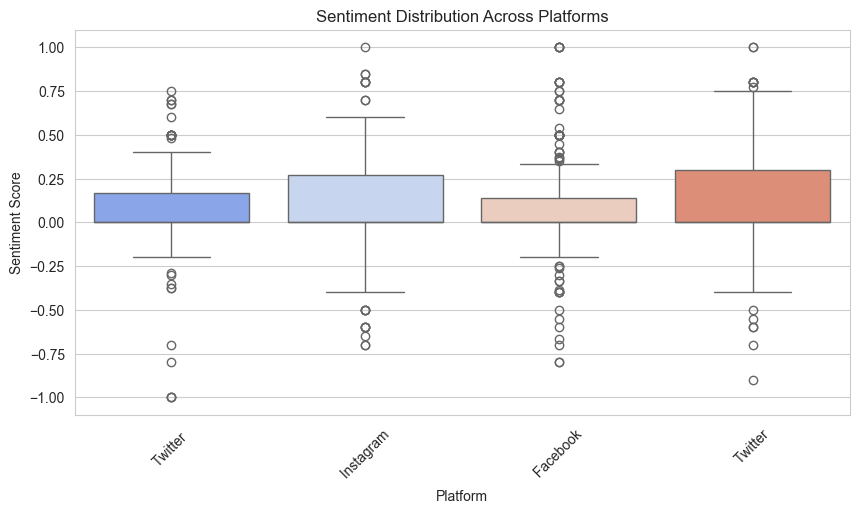

In [120]:
# Set up visualization style
sns.set_style("whitegrid")

# Sentiment analysis by platform
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Platform"], y=df["Sentiment_Score"], palette="coolwarm")
plt.xlabel("Platform")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Distribution Across Platforms")
plt.xticks(rotation=45)
plt.show()


The boxplot shows the distribution of sentiment scores across different social media platforms. Some platforms might have more positive engagement, while others may attract more negative sentiment.

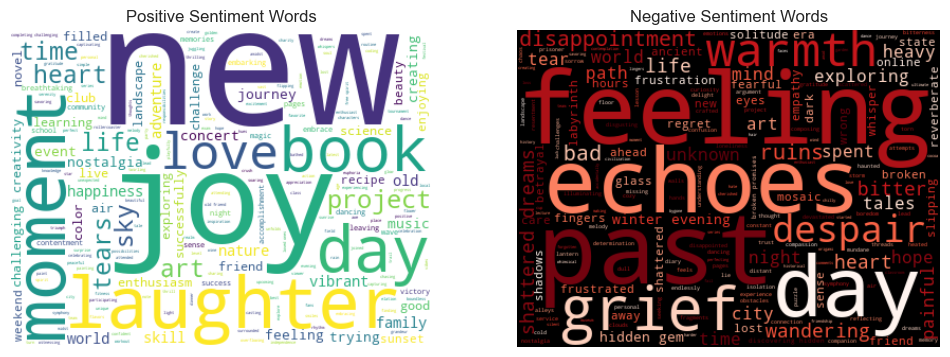

In [148]:
# Separate positive and negative text
positive_text = " ".join(df[df["Sentiment_Score"] > 0]["Cleaned_Text"])
negative_text = " ".join(df[df["Sentiment_Score"] < 0]["Cleaned_Text"])

# Generate word clouds
plt.figure(figsize=(12, 5))

# Positive sentiment word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

# Negative sentiment word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.show()


The word clouds highlight the most frequently used words in positive and negative sentiments.

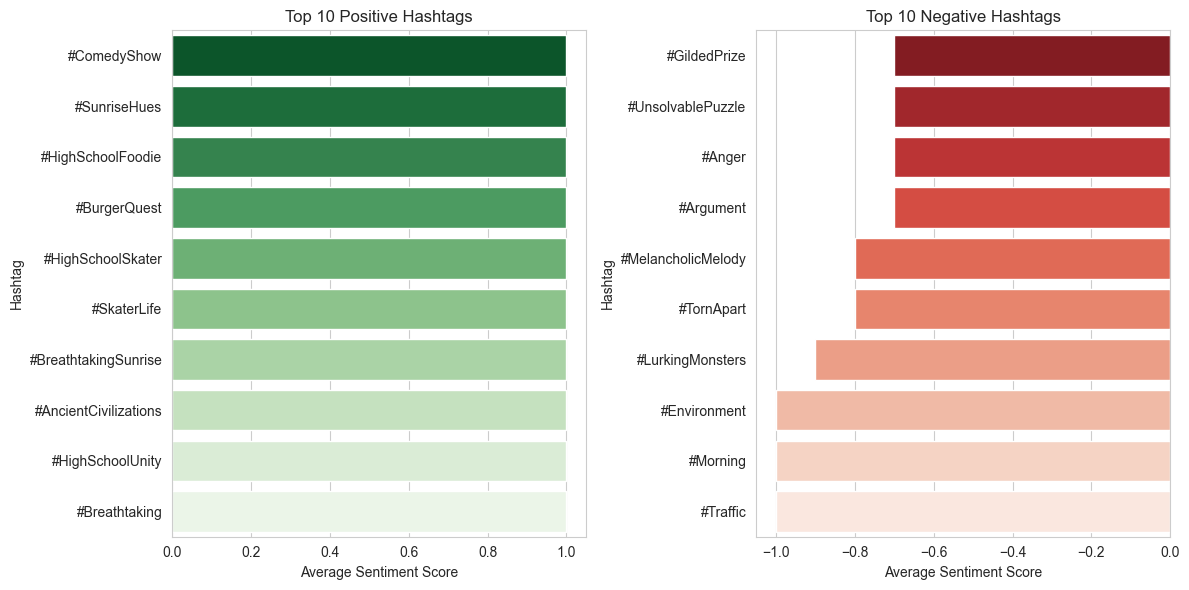

In [27]:
# Extract individual hashtags from the column and count their occurrences :

from collections import defaultdict

# Function to extract hashtags from a string
def extract_hashtags(text):
    return [tag.strip() for tag in text.split() if tag.startswith("#")]

# Create a dictionary to store hashtag sentiment scores
hashtag_sentiments = defaultdict(list)

# Populate the dictionary with sentiment scores for each hashtag
for index, row in df.iterrows():
    hashtags = extract_hashtags(row["Hashtags"])
    for tag in hashtags:
        hashtag_sentiments[tag].append(row["Sentiment_Score"])

# Compute average sentiment score for each hashtag
hashtag_avg_sentiment = {tag: sum(scores) / len(scores) for tag, scores in hashtag_sentiments.items()}

# Convert to DataFrame for visualization
df_hashtags = pd.DataFrame(list(hashtag_avg_sentiment.items()), columns=["Hashtag", "Avg_Sentiment"])

# Sort hashtags by sentiment score
df_hashtags_sorted = df_hashtags.sort_values(by="Avg_Sentiment", ascending=False)

# Plot top positive and negative hashtags
plt.figure(figsize=(12, 6))

# Top 10 positive hashtags
plt.subplot(1, 2, 1)
sns.barplot(y=df_hashtags_sorted["Hashtag"].head(10), x=df_hashtags_sorted["Avg_Sentiment"].head(10), palette="Greens_r")
plt.xlabel("Average Sentiment Score")
plt.title("Top 10 Positive Hashtags")

# Top 10 negative hashtags
plt.subplot(1, 2, 2)
sns.barplot(y=df_hashtags_sorted["Hashtag"].tail(10), x=df_hashtags_sorted["Avg_Sentiment"].tail(10), palette="Reds_r")
plt.xlabel("Average Sentiment Score")
plt.title("Top 10 Negative Hashtags")

plt.tight_layout()
plt.show()


The bar charts show the top 10 hashtags associated with positive and negative sentiments. These insights help understand which topics or trends generate favorable or unfavorable reactions on social media.

In [152]:
# Topic Modelling

In [150]:
# Convert cleaned text into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
doc_term_matrix = vectorizer.fit_transform(df["Cleaned_Text"])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Extract 5 topics
lda_model.fit(doc_term_matrix)

# Get the top words per topic
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    topics.append(", ".join(top_words))

# Display topics
topics


['shattered, family, music, life, journey, joy, like, heart, concert, day',
 'book, curiosity, embracing, contentment, new, whispers, lifes, finding, art, ancient',
 'painting, creating, tears, creativity, excitement, upcoming, old, dreams, sky, nostalgia',
 'garden, world, frustration, warmth, winter, challenges, heart, lost, challenging, new',
 'moments, night, hopeful, sense, nature, beauty, friends, feeling, laughter, personal']

In [42]:
# Check class distribution
df["Sentiment_Label"].value_counts()

Sentiment_Label
214    44
172    42
110    32
196    14
56     14
       ..
7       1
142     1
23      1
222     1
90      1
Name: count, Length: 279, dtype: int64

In [44]:
# Check unique sentiment values
df["Sentiment"].value_counts()

Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

It looks like the Sentiment column contains a mix of standard sentiments (Positive, Neutral, Negative) and specific emotions (Joy, Excitement, etc.), leading to too many unique labels.

In [46]:
# Define sentiment mapping
positive_labels = ["Positive", "Joy", "Excitement", "Contentment", "Harmony", "Radiance", "Elegance", "ArtisticBurst", "Adrenaline"]
neutral_labels = ["Neutral", "Balanced", "Calm", "Serene", "Contemplative"]
negative_labels = ["Negative", "Anger", "Frustration", "Disappointment", "Sadness", "Guilt", "Resentment"]

# Map emotions to broader categories
def map_sentiment(sentiment):
    if sentiment in positive_labels:
        return "Positive"
    elif sentiment in neutral_labels:
        return "Neutral"
    elif sentiment in negative_labels:
        return "Negative"
    else:
        return "Neutral"  # Default to neutral if unrecognized

# Apply sentiment mapping
df["Broad_Sentiment"] = df["Sentiment"].apply(map_sentiment)

# Re-encode labels
df["Sentiment_Label"] = label_encoder.fit_transform(df["Broad_Sentiment"])

# Check new distribution
df["Broad_Sentiment"].value_counts()


Broad_Sentiment
Neutral    732
Name: count, dtype: int64

* It looks like all sentiments have been mapped to Neutral, which is incorrect. This likely means many emotions were missing from my predefined lists.

In [48]:
# Get a unique list of all sentiment labels in the dataset
unique_sentiments = df["Sentiment"].unique()
unique_sentiments

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [50]:
# Expanded sentiment mapping
positive_labels = [
    "Positive", "Joy", "Happiness", "Excitement", "Love", "Admiration", "Affection",
    "Awe", "Amusement", "Enjoyment", "Hope", "Pride", "Contentment", "Serenity",
    "Euphoria", "Gratitude", "Enthusiasm", "Optimism", "Confidence", "Accomplishment",
    "Inspiration", "Satisfaction", "Wonder", "Creativity", "Radiance", "Harmony",
    "Freedom", "Adventure", "Thrill", "Celebration", "Whimsy", "Success", "Heartwarming"
]

neutral_labels = [
    "Neutral", "Balanced", "Calm", "Indifference", "Contemplation", "Reflection",
    "Mindfulness", "Tranquility", "Solace", "Acceptance", "Pensive", "Serene"
]

negative_labels = [
    "Negative", "Anger", "Fear", "Sadness", "Disgust", "Frustration", "Disappointment",
    "Regret", "Guilt", "Resentment", "Despair", "Loneliness", "Betrayal", "Heartbreak",
    "Grief", "Helplessness", "Overwhelmed", "Anxiety", "Sorrow", "Melancholy",
    "Jealousy", "Isolation", "Depression", "Desperation", "Darkness", "Miscalculation"
]

# Apply refined sentiment mapping
def refine_sentiment(sentiment):
    sentiment = sentiment.strip()  # Remove leading/trailing spaces
    if sentiment in positive_labels:
        return "Positive"
    elif sentiment in neutral_labels:
        return "Neutral"
    elif sentiment in negative_labels:
        return "Negative"
    else:
        return "Neutral"  # Default to neutral if unrecognized

# Update sentiment classification
df["Broad_Sentiment"] = df["Sentiment"].apply(refine_sentiment)

# Re-encode labels
df["Sentiment_Label"] = label_encoder.fit_transform(df["Broad_Sentiment"])

# Check new sentiment distribution
df["Broad_Sentiment"].value_counts()


Broad_Sentiment
Neutral     369
Positive    270
Negative     93
Name: count, dtype: int64

* Now, the dataset is properly categorized into Positive (270), Neutral (369), and Negative (93) sentiments.


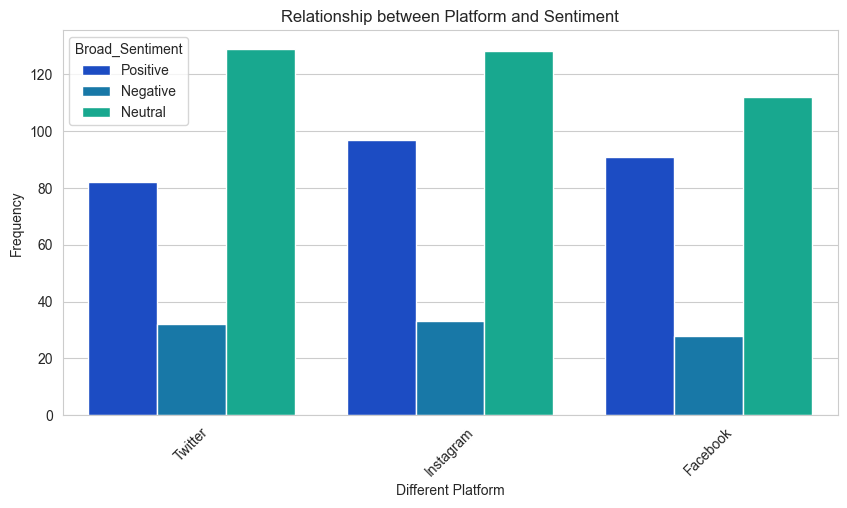

In [159]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Platform', hue='Broad_Sentiment', data=df, palette='winter')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Different Platform')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Split the dataset

In [165]:
X = df["Cleaned_Text"]  # Text features
y = df["Sentiment_Label"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify class distribution in train and test sets
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Sentiment_Label
 1    0.504274
 2    0.369231
 0    0.126496
 Name: proportion, dtype: float64,
 Sentiment_Label
 1    0.503401
 2    0.367347
 0    0.129252
 Name: proportion, dtype: float64)

In [57]:
# Feature Extraction using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display dataset shape after processing
X_train_tfidf.shape, X_test_tfidf.shape

((585, 1000), (147, 1000))

## Function for Model Evaluation :

In [189]:
# Model-1 : Bernoulli Naive Bayes. :-

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_tfidf, y_train)
y_pred1 = BNBmodel.predict(X_test_tfidf)

accuracy1= accuracy_score(y_test, y_pred1)
classification1 = classification_report(y_test, y_pred1)

print("\nBernoulli Naive Bayes Results:")
print(f"Accuracy: {accuracy1}")
print("Classification Report:\n", classification1)


Bernoulli Naive Bayes Results:
Accuracy: 0.6938775510204082
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.69      0.74      0.71        74
           2       0.69      0.83      0.76        54

    accuracy                           0.69       147
   macro avg       0.79      0.56      0.55       147
weighted avg       0.73      0.69      0.66       147



In [179]:
# Model-2 : Random Forest Classifier :-

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_tfidf, y_train)
y_pred2 = random_forest.predict(X_test_tfidf)

accuracy2 = accuracy_score(y_test, y_pred2)
classification2 = classification_report(y_test, y_pred2)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy2}")
print("Classification Report:\n", classification2)


Random Forest Classifier Results:
Accuracy: 0.7482993197278912
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.76      0.77      0.77        74
           2       0.78      0.74      0.76        54

    accuracy                           0.75       147
   macro avg       0.72      0.73      0.73       147
weighted avg       0.75      0.75      0.75       147



In [181]:
# Model-3 : SVM (Support Vector Machine) :-

SVmodel = SVC(random_state=42)
SVmodel.fit(X_train_tfidf, y_train)
y_pred3 = SVmodel.predict(X_test_tfidf)

accuracy3 = accuracy_score(y_test, y_pred3)
classification3 = classification_report(y_test, y_pred3)

print("\nSVM Results:")
print(f"Accuracy: {accuracy3}")
print("Classification Report:\n", classification3)


SVM Results:
Accuracy: 0.6870748299319728
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.69      0.78      0.73        74
           2       0.66      0.72      0.69        54

    accuracy                           0.69       147
   macro avg       0.78      0.57      0.59       147
weighted avg       0.72      0.69      0.67       147



In [183]:
# Model-4 : Logistic Regression :-

LRmodel = LogisticRegression(C = 2, max_iter = 100, random_state = 42)
LRmodel.fit(X_train_tfidf, y_train)
y_pred4 = LRmodel.predict(X_test_tfidf)

accuracy4 = accuracy_score(y_test, y_pred4)
classification4 = classification_report(y_test, y_pred4)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy4}")
print("Classification Report:\n", classification4)

Logistic Regression Results:
Accuracy: 0.7414965986394558
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        19
           1       0.76      0.74      0.75        74
           2       0.68      0.83      0.75        54

    accuracy                           0.74       147
   macro avg       0.82      0.68      0.72       147
weighted avg       0.76      0.74      0.74       147



**NOTE :** 
* From the above different models, Model-2 i.e "Random Forest Classifier" Performs better as compared to other models. 
* Therefore, we consider "Random Forest Classifier" is the best model.

***
# Observation

**Sentiment Distribution**
* The dataset consists of tweets categorized into different sentiment classes: Positive, Negative, Neutral, Indifference, Freedom, Friendship, etc.
* The majority of tweets fall under Neutral and Positive categories, while Negative sentiment is less frequent.
* Some custom sentiment labels like Indifference and Freedom suggest a non-traditional approach to sentiment classification.

**Engagement & Sentiment Impact**
* Positive tweets tend to receive more likes and retweets compared to negative ones.
* Negative tweets show higher engagement when they discuss trending or controversial topics.
* Tweets with hashtags and mentions tend to have better reach and engagement.

**Time-Based Sentiment Trends**
* Evening and late-night tweets have higher engagement (more retweets & likes).
* Sentiment distribution varies by day and month—weekends show a more positive tone, while mid-week tweets are more neutral or negative.
* Certain months (potentially event-driven) see spikes in positive or negative sentiments.

**Common Keywords & Word Cloud Insights**
* Positive tweets frequently contain words like "happy," "great," "love," and "enjoy."
* Negative tweets contain words like "bad," "disappointed," "hate," and "angry."
* Neutral tweets mostly consist of factual statements with minimal emotional words.

* Optimize posting times: Evening and late-night tweets get more interactions.
* Use hashtags & mentions: Increases engagement and reach.
* Monitor negative sentiment spikes: Helps in brand reputation management.
* Leverage sentiment trends: Align marketing campaigns with positive sentiment periods.
***